In [34]:
import pandas as pd
import numpy as np
from pandasql import sqldf 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import geopandas as gpd
from matplotlib_venn import venn2


In [3]:
## Cargamos los archivos par verlos con pandas 
pozos = pd.read_csv("capitulo-iv-pozos.csv")
produccion = pd.read_csv("produccin-de-pozos-de-gas-y-petrleo-2024.csv")
produccion_no_convencional = pd.read_csv("produccin-de-pozos-de-gas-y-petrleo-no-convencional.csv")

C:\Users\T14s\AppData\Local\Temp\ipykernel_6900\2856228318.py:3: DtypeWarning: Columns (16,36) have mixed types. Specify dtype option on import or set low_memory=False.
  produccion = pd.read_csv("produccin-de-pozos-de-gas-y-petrleo-2024.csv")


In [4]:
## Primero analizamos la unicidad de los datos de las tablas viendo sus cuolumnas para empezar a identificar que contiene cada una, sabiendo que se relacionan con la columna "idpozo"
print("Columnas pozos: ", pozos.columns)
print("Columnas produccion: ", produccion.columns)
print("Columnas produccion_no_convencional: ", produccion_no_convencional.columns)

Columnas pozos:  Index(['sigla', 'idpozo', 'area', 'cod_area', 'empresa', 'yacimiento',
       'cod_yacimiento', 'formacion', 'cuenca', 'provincia', 'cota',
       'profundidad', 'clasificacion', 'subclasificacion', 'tipo_recurso',
       'sub_tipo_recurso', 'gasplus', 'tipopozo', 'tipoextraccion',
       'tipoestado', 'adjiv_fecha_inicio_perf', 'adjiv_fecha_fin_perf',
       'adjiv_fecha_inicio_term', 'adjiv_fecha_fin_term', 'geojson', 'geom'],
      dtype='object')
Columnas produccion:  Index(['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas',
       'prod_agua', 'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef',
       'vida_util', 'tipoextraccion', 'tipoestado', 'tipopozo',
       'observaciones', 'fechaingreso', 'rectificado', 'habilitado',
       'idusuario', 'empresa', 'sigla', 'formprod', 'profundidad', 'formacion',
       'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento',
       'areayacimiento', 'cuenca', 'provincia', 'tipo_de_recurso', 'proyec

In [5]:
#Luego analizamos por columna que valores unicos contiene, para ver la unicidad de datos y que datos maneja cada columna
columnas_pozos = ['sigla', 'idpozo', 'area', 'cod_area', 'empresa', 'yacimiento',
            'cod_yacimiento', 'formacion', 'cuenca', 'provincia', 'cota',
            'profundidad', 'clasificacion', 'subclasificacion', 'tipo_recurso',
            'sub_tipo_recurso', 'gasplus', 'tipopozo', 'tipoextraccion',
            'tipoestado', 'adjiv_fecha_inicio_perf', 'adjiv_fecha_fin_perf',
            'adjiv_fecha_inicio_term', 'adjiv_fecha_fin_term', 'geojson', 'geom']

valores_unicos_pozos = {col: pozos[col].unique() for col in columnas_pozos}

for col, valores in valores_unicos_pozos.items():
    print(f"Columna: {col}")
    print(f"Valores únicos: {valores}\n")

Columna: sigla
Valores únicos: ['CH.CH.EaLE.x-1' 'CH.CH.EaLE.x-2' 'CH.CH.EaLE-3' ... 'CAP.Ch.I-182(d)'
 'PLU.Nq.LCa-3093(h)' 'TAU.MA.Fen-5(h)']

Columna: idpozo
Valores únicos: [   212    213    214 ... 165691 165692 165693]

Columna: area
Valores únicos: ['ESTANCIA LA ESCONDIDA' 'REVERTIDAS - CHUBUT' 'CAÑADON RAMIREZ'
 'MINA SALAMANCA' 'YACIMIENTO NORTE 1/B' 'PICO SALAMANCA' 'CAÑADON PILAR'
 'MATAMAGALLANES OESTE' 'CERRO NEGRO' 'CALMUCO' 'ESTANCIA LA MARIPOSA'
 'DEL MOSQUITO' 'CALMUCO - BARREALES COLORADOS' 'BAJO GUANACO'
 'COVUNCO NORTE SUR REVERTIDO' 'COVUNCO NORTE SUR' 'EL CHIVIL' 'IPAGUAZU'
 'MEDANITO' 'SURUBI' 'VALLE MORADO' 'CHAÑARES HERRADOS' 'RAMOS'
 'LOMA CORTADERAL' 'CERRO DOÑA JUANA' 'PUESTO POZO CERCADO OCCIDENTAL '
 'PUESTO POZO CERCADO ORIENTAL' 'ÑACATIMBAY' 'LAGUNA DE LOS CAPONES'
 'ENTRE LOMAS' 'EL SOSNEADO' 'CUTRAL CO' 'CUTRAL CO NORTE'
 'AGUADA DEL CHIVATO - AGUADA BOCAREY' 'DOS PICOS' 'EL TORDILLO'
 'RIO TUNUYAN' 'AGUARAGÜE' 'CATRIEL OESTE' 'TRES NIDOS'
 'FORTIN DE 

In [6]:
## Verificamos unicidad de [idpozos], viendo que hay mismas filas en el dataset que cantidad de idpozos unicos, esto asegura que no hay mas de un pozo con mismo idpozo
print("Cantidad de id de pozos: ", len(pozos['idpozo'].unique()))
print("Cantidad de filas en pozos: ", len(pozos))

Cantidad de id de pozos:  84282
Cantidad de filas en pozos:  84282


In [7]:
## Chequeamos si existen valores nulos, signos de preguntas o espacios vacios o en blanco, para evaluar si eliminarlos o no
print("Valores nulos: ", pozos.isnull().sum())
print("Signos de pregunta: ", (pozos == "?").sum())
print("Valores blancos: ", (pozos == " ").sum())

## Notamos que solo existen valores "Nulos" especificamente en las columnas: [empresa], [formacion], 
## [adjiv_fecha_inicio_perf], [adjiv_fecha_fin_perf], [adjiv_fecha_inicio_term], [adjiv_fecha_fin_term] y son 25mil aproximadamente,
## casi la mitad del dataset, decidimos no sacarlas ya que podrian afectar un analisis sobre el mismo.   

Valores nulos:  sigla                          0
idpozo                         0
area                           0
cod_area                       0
empresa                      897
yacimiento                     0
cod_yacimiento                 0
formacion                   2815
cuenca                         0
provincia                      0
cota                           0
profundidad                    0
clasificacion                  0
subclasificacion               0
tipo_recurso                   0
sub_tipo_recurso               0
gasplus                        0
tipopozo                       0
tipoextraccion                 0
tipoestado                     0
adjiv_fecha_inicio_perf    34139
adjiv_fecha_fin_perf       34284
adjiv_fecha_inicio_term    36590
adjiv_fecha_fin_term       36589
geojson                        0
geom                           0
dtype: int64
Signos de pregunta:  sigla                      0
idpozo                     0
area                       0
cod_a

In [8]:
## Chequeamos que id pozos tiene en las fechas null, y son 34.139 en total, un monton.
consulta1 = """
SELECT count(idpozo)
FROM pozos
WHERE  adjiv_fecha_inicio_perf IS NULL
  AND adjiv_fecha_fin_perf IS NULL
  AND adjiv_fecha_inicio_term IS NULL
  AND adjiv_fecha_fin_term IS NULL
"""

resultado1 = sqldf(consulta1, globals())
print(resultado1)

   count(idpozo)
0          34139


In [9]:
# Chequear si las fechas de inicio son anteriores a las fechas de fin, por ejemplo, en las columnas adjiv_fecha_inicio_perf y adjiv_fecha_fin_perf.
pozos['adjiv_fecha_inicio_perf'] = pd.to_datetime(pozos['adjiv_fecha_inicio_perf'], errors='coerce')
pozos['adjiv_fecha_fin_perf'] = pd.to_datetime(pozos['adjiv_fecha_fin_perf'], errors='coerce')

inconsistencias_fechas = pozos[pozos['adjiv_fecha_inicio_perf'] > pozos['adjiv_fecha_fin_perf']]
print("Cantidad de registros con fechas inconsistentes:", len(inconsistencias_fechas))


Cantidad de registros con fechas inconsistentes: 3


In [10]:
#Confirmar que las columnas de producción (prod_pet, prod_gas, etc.) y de inyección (iny_agua, iny_gas) no tienen valores negativos.
columnas_numericas = ['prod_pet', 'prod_gas', 'prod_agua', 'iny_agua', 'iny_gas']
negativos = produccion[columnas_numericas].lt(0).sum()
print("Valores negativos por columna:")
print(negativos)


Valores negativos por columna:
prod_pet     1
prod_gas     1
prod_agua    1
iny_agua     0
iny_gas      0
dtype: int64


In [11]:
# Validar si la combinación de anio, mes e idpozo es única en las tablas produccion y produccion_no_convencional.
combinaciones_unicas = len(produccion[['anio', 'mes', 'idpozo']].drop_duplicates())
total_registros = len(produccion)
print(f"Combinaciones únicas: {combinaciones_unicas}, Total registros: {total_registros}")


Combinaciones únicas: 806536, Total registros: 806536


In [12]:
#Validar si los meses (mes) están dentro del rango válido (1 a 12).
meses_invalidos = produccion[(produccion['mes'] < 1) | (produccion['mes'] > 12)]
print("Cantidad de registros con meses fuera de rango:", len(meses_invalidos))


Cantidad de registros con meses fuera de rango: 0


In [13]:
# Validar que todos los idpozo en produccion existen también en pozos.
pozos_ids = set(pozos['idpozo'])
produccion_ids = set(produccion['idpozo'])
ids_faltantes = produccion_ids - pozos_ids
print("Cantidad de idpozo en Producción que no están en Pozos:", len(ids_faltantes))


Cantidad de idpozo en Producción que no están en Pozos: 78


In [14]:
# Identificar producción de pozos que no están en la tabla pozos
idpozos_no_en_pozos = produccion[produccion['idpozo'].isin(ids_faltantes)]

# Mostrar resumen de la producción de esos pozos
print("Producción de los 55 pozos no encontrados en la tabla Pozos:")
print(idpozos_no_en_pozos[['idpozo', 'prod_pet', 'prod_gas', 'prod_agua']].describe())


Producción de los 55 pozos no encontrados en la tabla Pozos:
              idpozo     prod_pet    prod_gas    prod_agua
count     339.000000   339.000000  339.000000   339.000000
mean   140523.094395    44.435380    9.483005   109.829818
std     13229.344800   206.633925   48.094399   429.485220
min    118834.000000     0.000000    0.000000     0.000000
25%    134205.000000     0.000000    0.000000     0.000000
50%    134215.000000     0.000000    0.000000     0.000000
75%    147128.000000     0.000000    0.000000     0.000000
max    165744.000000  2229.050000  448.020000  3569.720000


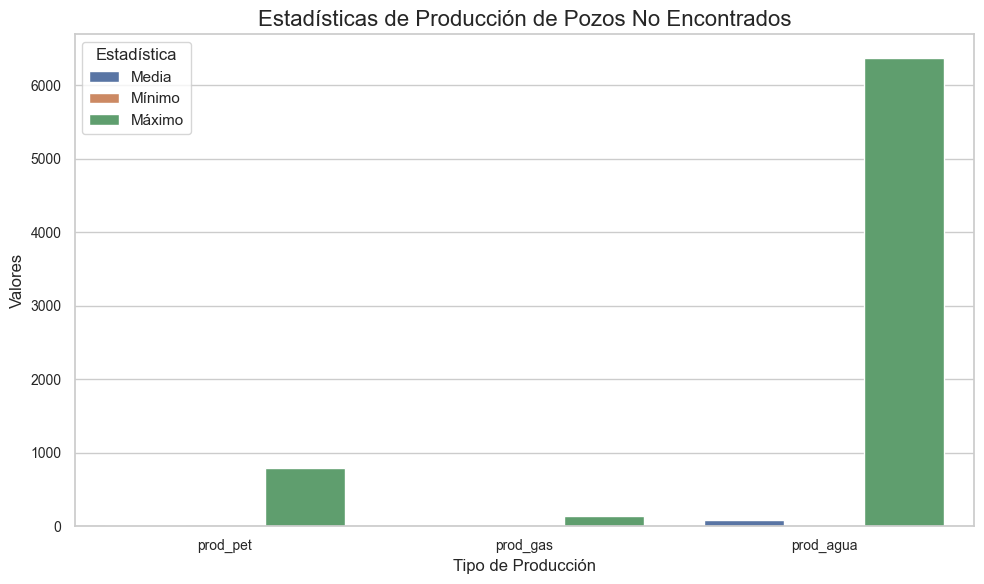

In [ ]:
## Aca graficamos en medida a que tipo de produccion, hay pozos no encontrados.
data = {
    "prod_pet": [15.78, 0.0, 787.65],
    "prod_gas": [1.41, 0.0, 134.85],
    "prod_agua": [78.14, 0.0, 6373.9],
    "Variable": ["Media", "Mínimo", "Máximo"]
}

df = pd.DataFrame(data)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df.melt(id_vars="Variable", var_name="Producción", value_name="Valor"), 
                 x="Producción", y="Valor", hue="Variable")
plt.title("Estadísticas de Producción de Pozos No Encontrados", fontsize=16)
plt.xlabel("Tipo de Producción", fontsize=12)
plt.ylabel("Valores", fontsize=12)
plt.legend(title="Estadística")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

In [16]:
## Analizamos la frecuencia de los valores únicos en la columna 'tipopozo' para evaluar en las proximas instancias
## con que tipos nos vamos a quedar ya que vamos a querer evaluar los pozos Petroliferos y Gasiferos.
frecuencia_valores = pozos['tipopozo'].value_counts()
print(frecuencia_valores)


tipopozo
Petrolífero                        39606
Otro tipo                          28466
Inyección de Agua                   8640
Gasífero                            6523
Sumidero                             634
Acuífero                             327
No informado                          68
Inyección de Gas                      14
Monitoreo de almacenamiento            2
Bidireccional de almacenamiento        2
Name: count, dtype: int64


C:\Users\T14s\AppData\Local\Temp\ipykernel_6900\490100301.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y='Tipo de Pozo', data=df, palette='viridis')


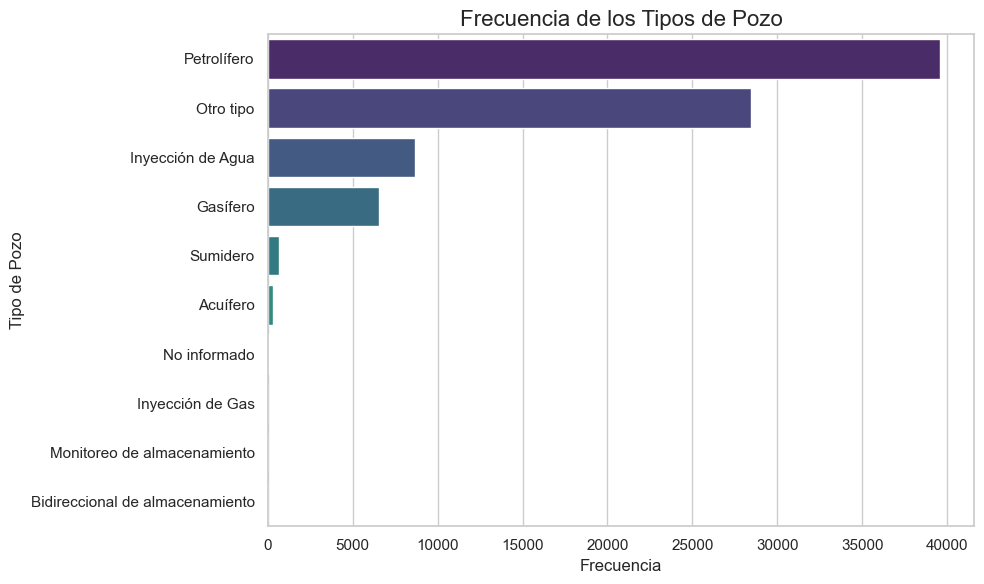

In [ ]:
## Grafico con frecuencia de pozos por tipopozo.
data = {
    'Tipo de Pozo': ['Petrolífero', 'Otro tipo', 'Inyección de Agua', 'Gasífero', 'Sumidero',
                     'Acuífero', 'No informado', 'Inyección de Gas', 
                     'Monitoreo de almacenamiento', 'Bidireccional de almacenamiento'],
    'Frecuencia': [39606, 28466, 8640, 6523, 634, 327, 68, 14, 2, 2]
}
df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
sns.barplot(x='Frecuencia', y='Tipo de Pozo', data=df, palette='viridis')
plt.title('Frecuencia de los Tipos de Pozo', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Tipo de Pozo', fontsize=12)
plt.tight_layout()
plt.show()

In [18]:
## Luego de este analisis, tomamos la decision de quedarnos solo con los tipos de pozos de Gas y Petroleo, 
## que son los que nos importa para este trabajo.
gas_petroleo = pozos[pozos['tipopozo'].isin(['Petrolífero', 'Gasífero'])]
gas_petroleo.shape


(46129, 26)

In [19]:
## Unimos nuestra tabla de pozos con los tipo pozos de gas y petroleo, con nuestra tabla de produccion para empezar a ver un
## analisis descrpitivo en los pozos convencionales.
consulta2 = """SELECT *
                FROM gas_petroleo g
                JOIN produccion p
                USING(idpozo)
                """

pozosUproduccion = sqldf(consulta2, globals())
print(pozosUproduccion)

                  sigla  idpozo                       area cod_area  \
0        CH.CH.EaLE.x-1     212      ESTANCIA LA ESCONDIDA      ECH   
1        CH.CH.EaLE.x-1     212      ESTANCIA LA ESCONDIDA      ECH   
2        CH.CH.EaLE.x-1     212      ESTANCIA LA ESCONDIDA      ECH   
3        CH.CH.EaLE.x-1     212      ESTANCIA LA ESCONDIDA      ECH   
4        CH.CH.EaLE.x-1     212      ESTANCIA LA ESCONDIDA      ECH   
...                 ...     ...                        ...      ...   
434779   YPF.SC.LM-1012  165690  LOS PERALES - LAS MESETAS      PER   
434780  CAP.Ch.I-182(d)  165691                    DIADEMA      DIA   
434781  CAP.Ch.I-182(d)  165691                    DIADEMA      DIA   
434782  TAU.MA.Fen-5(h)  165693    CUENCA MARINA AUSTRAL 1      CAU   
434783  TAU.MA.Fen-5(h)  165693    CUENCA MARINA AUSTRAL 1      CAU   

                                    empresa  \
0                         COLHUE HUAPI S.A.   
1                         COLHUE HUAPI S.A.   
2     

In [20]:
pozosUproduccion.columns

Index(['sigla', 'idpozo', 'area', 'cod_area', 'empresa', 'yacimiento',
       'cod_yacimiento', 'formacion', 'cuenca', 'provincia', 'cota',
       'profundidad', 'clasificacion', 'subclasificacion', 'tipo_recurso',
       'sub_tipo_recurso', 'gasplus', 'tipopozo', 'tipoextraccion',
       'tipoestado', 'adjiv_fecha_inicio_perf', 'adjiv_fecha_fin_perf',
       'adjiv_fecha_inicio_term', 'adjiv_fecha_fin_term', 'geojson', 'geom',
       'idempresa', 'anio', 'mes', 'prod_pet', 'prod_gas', 'prod_agua',
       'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef', 'vida_util',
       'tipoextraccion', 'tipoestado', 'tipopozo', 'observaciones',
       'fechaingreso', 'rectificado', 'habilitado', 'idusuario', 'empresa',
       'sigla', 'formprod', 'profundidad', 'formacion',
       'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento',
       'areayacimiento', 'cuenca', 'provincia', 'tipo_de_recurso', 'proyecto',
       'clasificacion', 'subclasificacion', 'sub_tipo_recurso', 'fe

In [21]:
## Agarramos las columnas que contienen la informacion de la produccion convencional y filtramos por el año 2024
produccion_2024 = produccion[produccion['anio'] == 2024]
columnas = ['prod_pet', 'prod_gas']
print(produccion_2024[columnas])



        prod_pet  prod_gas
0            0.0       0.0
1            0.0       0.0
2            0.0       0.0
3            0.0       0.0
4            0.0       0.0
...          ...       ...
806531       0.0       0.0
806532       0.0       0.0
806533       0.0       0.0
806534       0.0       0.0
806535       0.0       0.0

[806536 rows x 2 columns]


In [22]:
# Filtrar producción convencional para el año 2024 y excluir producciones negativas
produccion_2024 = produccion[(produccion['anio'] == 2024) & (produccion['prod_pet'] >= 0)]

# Seleccionar los top 5 pozos con mayor producción de petróleo convencional
top_5_pozos_petroleo = produccion_2024.nlargest(5, 'prod_pet')[['idpozo', 'prod_pet', 'provincia']]

# Seleccionar los top 5 pozos con menor producción de petróleo convencional
bottom_5_pozos_petroleo = produccion_2024.nsmallest(5, 'prod_pet')[['idpozo', 'prod_pet', 'provincia']]

# Combinar los resultados de los top 5 y bottom 5 pozos
top_bottom_pozos_petroleo = pd.concat([top_5_pozos_petroleo, bottom_5_pozos_petroleo])

# Mostrar los resultados combinados
print(top_bottom_pozos_petroleo)



        idpozo   prod_pet  provincia
399827  164941  19826.739    Neuquén
398457  164941  18034.332    Neuquén
399255  164941  16436.799    Neuquén
397758  164941  14645.788    Neuquén
398948  164941  14528.627    Neuquén
0        32186      0.000  Rio Negro
1       144117      0.000  Rio Negro
2       145614      0.000  Rio Negro
3       145615      0.000  Rio Negro
4       145626      0.000  Rio Negro


In [23]:
## Hacemos la suma por columnas para obtener el tota producido en pozos convencionales de Gas y Pretroleo en 2024
produccion_2024 = produccion[produccion['anio'] == 2024]
columnas = ['prod_pet', 'prod_gas']
data = produccion_2024[columnas]
suma_columnas = data.sum()
pd.set_option('display.float_format', '{:.2f}'.format)
print(suma_columnas)



prod_pet   33313653.11
prod_gas   42317680.84
dtype: float64


In [ ]:
# Calcular la suma total de producción de petróleo convencional en 2024
total_prod_pet = produccion_2024['prod_pet'].sum()
produccion_pet_por_provincia = produccion_2024.groupby('provincia')['prod_pet'].sum().reset_index()
produccion_pet_por_provincia = produccion_pet_por_provincia.sort_values(by='prod_pet', ascending=False)
print(f"Total producido de petróleo en pozos convencionales (2024): {total_prod_pet}")
print("Producción de petróleo por provincia:")
print(produccion_pet_por_provincia)


Total producido de petróleo en pozos convencionales (2024): 33313653.11436099
Producción de petróleo por provincia:
           provincia    prod_pet
6            Neuquén 19566879.08
0             Chubut  5812457.43
9         Santa Cruz  3135448.19
5            Mendoza  2727703.99
7          Rio Negro   949102.41
4           La Pampa   611367.82
10  Tierra del Fuego   176568.09
1    Estado Nacional   162869.75
8              Salta   133679.04
2            Formosa    29351.38
3              Jujuy     8225.93


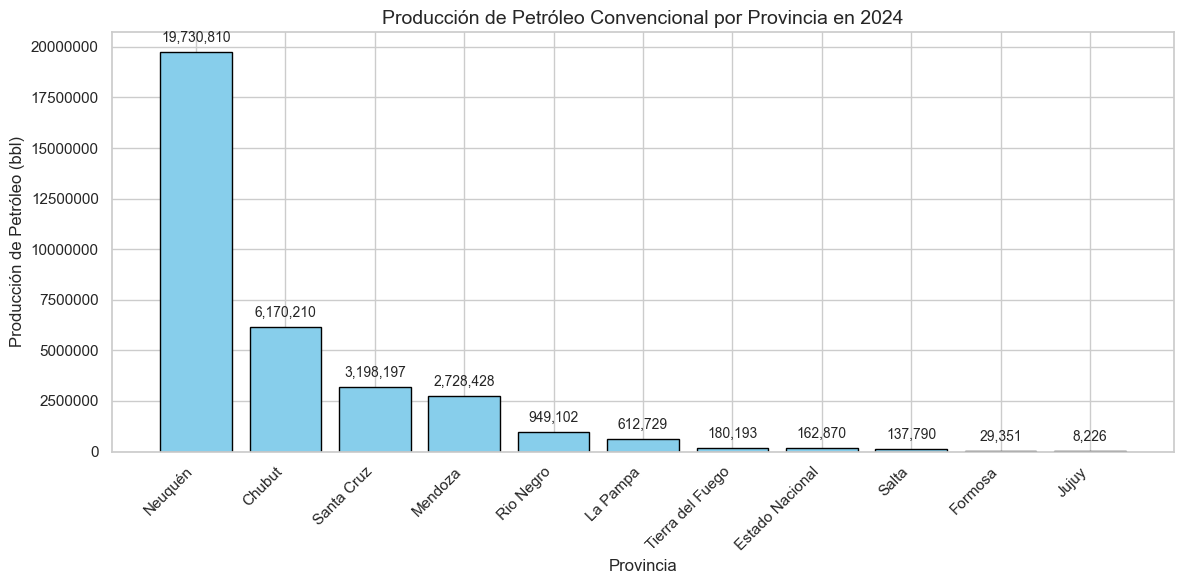

In [ ]:
## Grafico de produccion convencional por provincia 2024
data = {
    "provincia": [
        "Neuquén", "Chubut", "Santa Cruz", "Mendoza", "Rio Negro",
        "La Pampa", "Tierra del Fuego", "Estado Nacional", "Salta", "Formosa", "Jujuy"
    ],
    "prod_pet": [
        1.973081e+07, 6.170210e+06, 3.198197e+06, 2.728428e+06, 9.491024e+05,
        6.127289e+05, 1.801931e+05, 1.628698e+05, 1.377897e+05, 2.935138e+04, 8.225931e+03
    ]
}
df = pd.DataFrame(data)
df = df.sort_values(by="prod_pet", ascending=False)
plt.figure(figsize=(12, 6))
plt.ticklabel_format(style='plain', axis='y')  # Evitar notación científica en el eje Y
plt.bar(df["provincia"], df["prod_pet"], color="skyblue", edgecolor="black")
plt.xlabel("Provincia", fontsize=12)
plt.ylabel("Producción de Petróleo (bbl)", fontsize=12)
plt.title("Producción de Petróleo Convencional por Provincia en 2024", fontsize=14)
plt.xticks(rotation=45, ha="right")
for index, value in enumerate(df["prod_pet"]):
    plt.text(index, value + 5e5, f"{value:,.0f}", ha="center", fontsize=10)  # Formato normal con comas
plt.tight_layout()
plt.show()


In [26]:
## Unimos nuestra tabla de pozos con los tipo pozos de gas y petroleo, con nuestra tabla de produccion no convencional para empezar a ver un
## analisis descrpitivo en los pozos convencionales no convencionales.
consulta4 = """SELECT *
                FROM gas_petroleo g
                JOIN produccion_no_convencional pn
                USING(idpozo)
                """

pozosUproduccion_no_convencional = sqldf(consulta4, globals())
print(pozosUproduccion_no_convencional)

                     sigla  idpozo                           area cod_area  \
0              PPC.Nq.EC-4    3640                    ENTRE LOMAS      ELO   
1              PPC.Nq.EC-4    3640                    ENTRE LOMAS      ELO   
2              PPC.Nq.EC-4    3640                    ENTRE LOMAS      ELO   
3              PPC.Nq.EC-4    3640                    ENTRE LOMAS      ELO   
4              PPC.Nq.EC-4    3640                    ENTRE LOMAS      ELO   
...                    ...     ...                            ...      ...   
290572  YPF.Nq.LajE-173(h)  165686  LOMA LA LATA - SIERRA BARROSA      LDL   
290573  YPF.Nq.LajE-184(h)  165687  LOMA LA LATA - SIERRA BARROSA      LDL   
290574  YPF.Nq.LajE-184(h)  165687  LOMA LA LATA - SIERRA BARROSA      LDL   
290575  YPF.Nq.LajE-195(h)  165688  LOMA LA LATA - SIERRA BARROSA      LDL   
290576  YPF.Nq.LajE-195(h)  165688  LOMA LA LATA - SIERRA BARROSA      LDL   

                                 empresa      yacimiento cod_ya

In [27]:
pozosUproduccion_no_convencional.columns

Index(['sigla', 'idpozo', 'area', 'cod_area', 'empresa', 'yacimiento',
       'cod_yacimiento', 'formacion', 'cuenca', 'provincia', 'cota',
       'profundidad', 'clasificacion', 'subclasificacion', 'tipo_recurso',
       'sub_tipo_recurso', 'gasplus', 'tipopozo', 'tipoextraccion',
       'tipoestado', 'adjiv_fecha_inicio_perf', 'adjiv_fecha_fin_perf',
       'adjiv_fecha_inicio_term', 'adjiv_fecha_fin_term', 'geojson', 'geom',
       'idempresa', 'anio', 'mes', 'prod_pet', 'prod_gas', 'prod_agua',
       'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef', 'vida_util',
       'tipoextraccion', 'tipoestado', 'tipopozo', 'observaciones',
       'fechaingreso', 'rectificado', 'habilitado', 'idusuario', 'empresa',
       'sigla', 'formprod', 'profundidad', 'formacion',
       'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento',
       'areayacimiento', 'cuenca', 'provincia', 'coordenadax', 'coordenaday',
       'tipo_de_recurso', 'proyecto', 'clasificacion', 'subclasifica

In [28]:
## Agarramos las columnas que contienen la informacion de la produccion no convencional 
## y filtramos por el año 2024 
produccion_no_convencional_2024 = produccion_no_convencional[produccion_no_convencional['anio'] == 2024]
columnas_n = ['prod_pet', 'prod_gas']
print(produccion_no_convencional_2024[columnas_n])

        prod_pet  prod_gas
19650      85.62   1646.10
19652       0.00      0.00
19654     550.40     48.94
19656       0.00      0.00
19658       4.38    458.03
...          ...       ...
324062     15.64    172.01
324063     60.73    585.95
324064     19.10     15.26
324065      0.00      0.00
324066      0.00      0.00

[40080 rows x 2 columns]


In [29]:
## Hacemos la suma por columnas para obtener el tota producido en pozos no convencionales de Gas y Pretroleo en 2024
produccion_no_convencional_2024 = produccion_no_convencional[produccion_no_convencional['anio'] == 2024]
columnas_n = ['prod_pet', 'prod_gas']
data_n = produccion_no_convencional_2024[columnas_n]
suma_columnas_n = data_n.sum()
pd.set_option('display.float_format', '{:.2f}'.format)
print(suma_columnas_n)


prod_pet   18630057.34
prod_gas   27284972.41
dtype: float64


In [ ]:
# Filtrar producción no convencional para el año 2024 y excluir producciones negativas
produccion_no_convencional_2024 = produccion_no_convencional[
    (produccion_no_convencional['anio'] == 2024) & (produccion_no_convencional['prod_pet'] >= 0)
]
top_5_pozos_petroleo_no_convencional = produccion_no_convencional_2024.nlargest(5, 'prod_pet')[['idpozo', 'prod_pet', 'provincia']]
bottom_5_pozos_petroleo_no_convencional = produccion_no_convencional_2024.nsmallest(5, 'prod_pet')[['idpozo', 'prod_pet', 'provincia']]
top_bottom_pozos_petroleo_no_convencional = pd.concat([top_5_pozos_petroleo_no_convencional, bottom_5_pozos_petroleo_no_convencional])
print(top_bottom_pozos_petroleo_no_convencional)



        idpozo  prod_pet  provincia
192976  164941  19826.74    Neuquén
191871  164941  18034.33    Neuquén
192526  164941  16436.80    Neuquén
190926  164941  14645.79    Neuquén
191974  164941  14528.63    Neuquén
19652   159688      0.00  Rio Negro
19656   156873      0.00    Neuquén
19660   155540      0.00    Neuquén
19664   155539      0.00    Neuquén
19674   155525      0.00    Neuquén


Cantidad de pozos que son convencionales y no convencionales: 4185
IDs de pozos en ambas categorías: {155648, 163841, 163840, 163843, 163844, 163842, 163845, 147463, 163848, 147465, 147466, 147467, 147468, 147469, 147470, 147471, 147472, 147473, 147474, 163856, 147476, 147477, 147478, 147479, 163855, 163859, 163857, 163858, 147484, 147486, 147487, 147488, 163873, 163874, 163875, 163876, 163880, 155693, 155694, 163885, 155696, 147505, 163897, 155712, 163905, 155713, 155717, 155718, 155721, 163913, 163915, 73804, 147537, 147538, 155733, 163927, 163928, 155743, 155744, 155745, 155746, 163940, 163941, 163942, 163943, 163944, 163945, 163946, 163947, 163948, 155749, 163950, 163951, 163952, 163953, 163955, 147584, 163969, 163970, 163971, 163972, 163968, 163974, 163975, 163977, 147593, 155785, 155786, 164000, 147617, 147618, 147619, 147620, 147621, 147622, 147623, 147624, 147625, 147626, 147627, 147628, 147629, 147630, 147631, 147632, 147633, 147634, 114867, 147635, 147637, 147638, 147639, 147

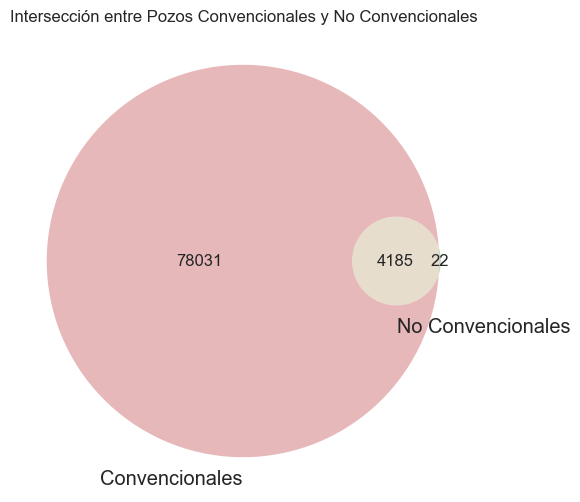

In [35]:
# Obtener los idpozo en ambos datasets
convencionales_ids = set(produccion['idpozo'])
no_convencionales_ids = set(produccion_no_convencional['idpozo'])

# Identificar los pozos que están en ambos datasets
pozos_duplicados = convencionales_ids.intersection(no_convencionales_ids)

# Mostrar cuántos pozos están en ambas categorías
print(f"Cantidad de pozos que son convencionales y no convencionales: {len(pozos_duplicados)}")

# Opcional: Mostrar los IDs de los pozos duplicados
print("IDs de pozos en ambas categorías:", pozos_duplicados)


import matplotlib.pyplot as plt

# Supongamos que ya tenemos las cantidades calculadas
# Número de pozos en cada categoría
total_convencionales = len(produccion['idpozo'].unique())
total_no_convencionales = len(produccion_no_convencional['idpozo'].unique())
duplicados = len(pozos_duplicados)

# Calcular valores exclusivos
solo_convencionales = total_convencionales - duplicados
solo_no_convencionales = total_no_convencionales - duplicados

plt.figure(figsize=(8, 6))
venn = venn2(
    subsets=(solo_convencionales, solo_no_convencionales, duplicados),
    set_labels=('Convencionales', 'No Convencionales')
)
plt.title("Intersección entre Pozos Convencionales y No Convencionales")
plt.show()


In [ ]:
# Filtrar producción convencional para el año 2024 y excluir producciones negativas
produccion_gas_convencional_2024 = produccion[
    (produccion['anio'] == 2024) & (produccion['prod_gas'] >= 0)
]
top_5_pozos_gas_convencional = produccion_gas_convencional_2024.nlargest(5, 'prod_gas')[['idpozo', 'prod_gas', 'provincia']]
bottom_5_pozos_gas_convencional = produccion_gas_convencional_2024.nsmallest(5, 'prod_gas')[['idpozo', 'prod_gas', 'provincia']]
top_bottom_pozos_gas_convencional = pd.concat([top_5_pozos_gas_convencional, bottom_5_pozos_gas_convencional])
print(top_bottom_pozos_gas_convencional)


        idpozo   prod_gas        provincia
435749  165693  150618.90  Estado Nacional
428502   10464   85016.22  Estado Nacional
429992   10464   78533.96  Estado Nacional
429287   10464   73944.48  Estado Nacional
433316   10465   73885.99  Estado Nacional
0        32186       0.00        Rio Negro
1       144117       0.00        Rio Negro
2       145614       0.00        Rio Negro
3       145615       0.00        Rio Negro
4       145626       0.00        Rio Negro


In [ ]:
# Filtrar producción convencional para el año 2024
produccion_gas_convencional_2024 = produccion[
    (produccion['anio'] == 2024) & (produccion['prod_gas'] >= 0)
]
produccion_gas_por_provincia = produccion_gas_convencional_2024.groupby('provincia')['prod_gas'].sum().reset_index()
produccion_gas_por_provincia = produccion_gas_por_provincia.sort_values(by='prod_gas', ascending=False)
print(produccion_gas_por_provincia)


           provincia      prod_gas
6            Neuquén  2.971544e+07
1    Estado Nacional  4.513705e+06
9         Santa Cruz  2.692341e+06
0             Chubut  2.162773e+06
10  Tierra del Fuego  1.293530e+06
8              Salta  1.024874e+06
7          Rio Negro  1.005326e+06
5            Mendoza  4.610968e+05
4           La Pampa  1.832022e+05
2            Formosa  4.270000e+03
3              Jujuy  2.334038e+03


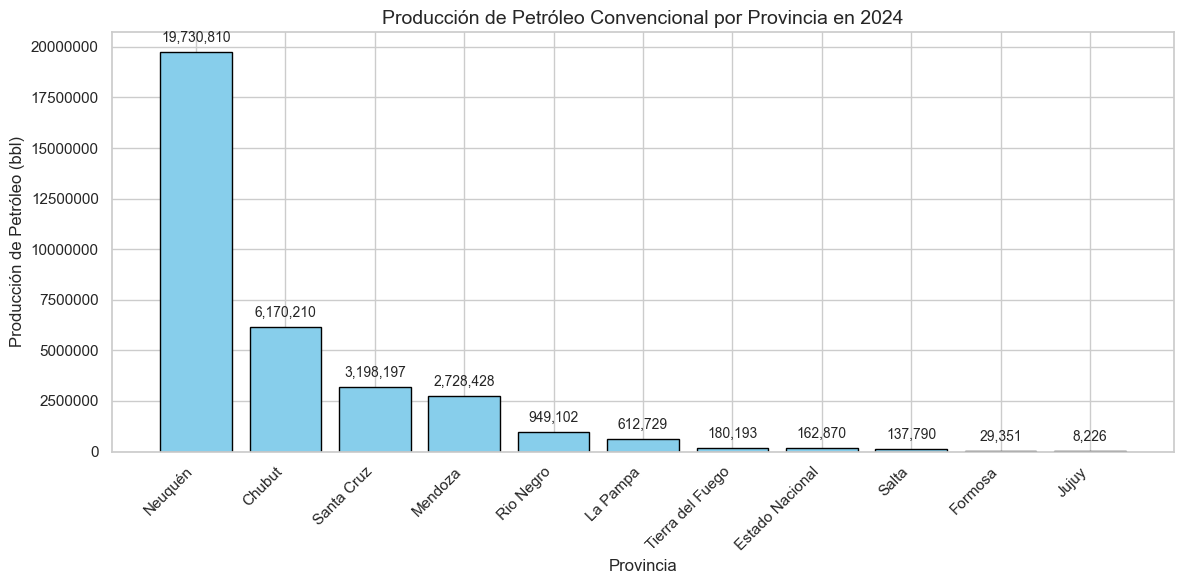

In [ ]:
data = {
    "provincia": [
        "Neuquén", "Chubut", "Santa Cruz", "Mendoza", "Rio Negro",
        "La Pampa", "Tierra del Fuego", "Estado Nacional", "Salta", "Formosa", "Jujuy"
    ],
    "prod_pet": [
        1.973081e+07, 6.170210e+06, 3.198197e+06, 2.728428e+06, 9.491024e+05,
        6.127289e+05, 1.801931e+05, 1.628698e+05, 1.377897e+05, 2.935138e+04, 8.225931e+03
    ]
}
df = pd.DataFrame(data)
df = df.sort_values(by="prod_pet", ascending=False)
plt.figure(figsize=(12, 6))
plt.ticklabel_format(style='plain', axis='y')  # Evitar notación científica en el eje Y
plt.bar(df["provincia"], df["prod_pet"], color="skyblue", edgecolor="black")
plt.xlabel("Provincia", fontsize=12)
plt.ylabel("Producción de Petróleo (bbl)", fontsize=12)
plt.title("Producción de Petróleo Convencional por Provincia en 2024", fontsize=14)
plt.xticks(rotation=45, ha="right")
for index, value in enumerate(df["prod_pet"]):
    plt.text(index, value + 5e5, f"{value:,.0f}", ha="center", fontsize=10)  # Formato normal con comas
plt.tight_layout()
plt.show()



In [ ]:
# Analizar los pozos en Neuquén y Estado Nacional
neuquen_pozos = produccion_gas_convencional_2024[produccion_gas_convencional_2024['provincia'] == 'Neuquén']
estado_nacional_pozos = produccion_gas_convencional_2024[produccion_gas_convencional_2024['provincia'] == 'Estado Nacional']
print("Producción total en Neuquén:", neuquen_pozos['prod_gas'].sum())
print("Producción total en Estado Nacional:", estado_nacional_pozos['prod_gas'].sum())


Producción total en Neuquén: 29715440.905957423
Producción total en Estado Nacional: 4513704.626


In [ ]:
# Filtrar producción no convencional para el año 2024 y excluir producciones negativas
produccion_gas_no_convencional_2024 = produccion_no_convencional[
    (produccion_no_convencional['anio'] == 2024) & (produccion_no_convencional['prod_gas'] >= 0)
]
top_5_pozos_gas_no_convencional = produccion_gas_no_convencional_2024.nlargest(5, 'prod_gas')[['idpozo', 'prod_gas', 'provincia']]
bottom_5_pozos_gas_no_convencional = produccion_gas_no_convencional_2024.nsmallest(5, 'prod_gas')[['idpozo', 'prod_gas', 'provincia']]
top_bottom_pozos_gas_no_convencional = pd.concat([top_5_pozos_gas_no_convencional, bottom_5_pozos_gas_no_convencional])
print(top_bottom_pozos_gas_no_convencional)


        idpozo   prod_gas  provincia
255367  165073  27460.550    Neuquén
254363  165073  25451.760    Neuquén
235358  164006  22909.539    Neuquén
238214  164006  22508.177    Neuquén
254209  165073  22493.020    Neuquén
19652   159688      0.000  Rio Negro
19656   156873      0.000    Neuquén
19660   155540      0.000    Neuquén
19674   155525      0.000    Neuquén
19686   155537      0.000    Neuquén


In [ ]:
# Agrupar los pozos de gas no convencionales por provincia y contar la cantidad de pozos en cada una
distribucion_pozos_gas_no_conv = produccion_no_convencional_2024.groupby('provincia')['idpozo'].nunique().reset_index()
distribucion_pozos_gas_no_conv.columns = ['Provincia', 'Cantidad de Pozos']
print(distribucion_pozos_gas_no_conv)




    Provincia  Cantidad de Pozos
0      Chubut                  3
1     Mendoza                 32
2     Neuquén               3712
3   Rio Negro                229
4       Salta                  3
5  Santa Cruz                210


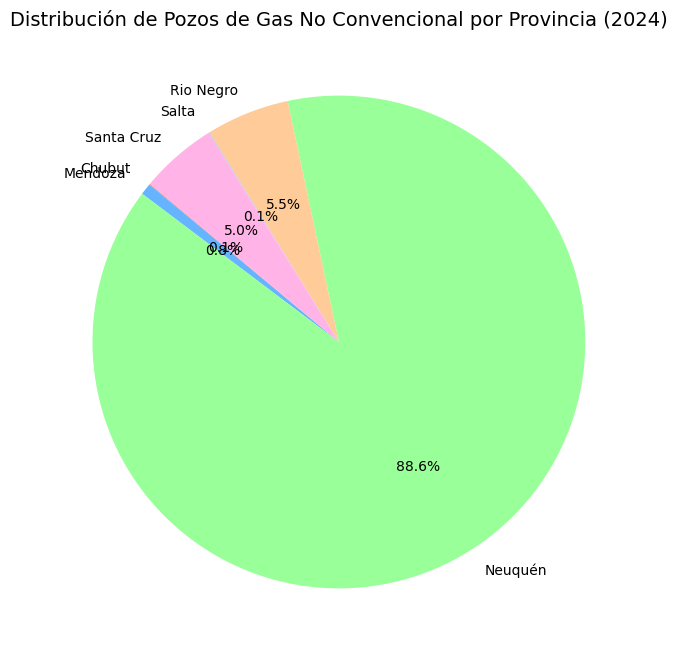

In [ ]:

data = {
    "Provincia": ["Chubut", "Mendoza", "Neuquén", "Rio Negro", "Salta", "Santa Cruz"],
    "Cantidad de Pozos": [3, 32, 3712, 229, 3, 210]
}
plt.figure(figsize=(8, 8))
plt.pie(
    data["Cantidad de Pozos"],
    labels=data["Provincia"],
    autopct="%1.1f%%",
    startangle=140,
    colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0", "#ffb3e6"]
)

plt.title("Distribución de Pozos de Gas No Convencional por Provincia (2024)", fontsize=14)
plt.show()


In [ ]:
# Identificar pozos únicos de gas convencional
pozos_gas_convencional = set(
    produccion[(produccion['anio'] == 2024) & (produccion['prod_gas'] > 0)]['idpozo']
)
pozos_gas_no_convencional = set(
    produccion_no_convencional_2024[(produccion_no_convencional_2024['prod_gas'] > 0)]['idpozo']
)
interseccion_pozos_gas = pozos_gas_convencional.intersection(pozos_gas_no_convencional)
cantidad_interseccion = len(interseccion_pozos_gas)
print("Cantidad de pozos únicos de gas convencional:", len(pozos_gas_convencional))
print("Cantidad de pozos únicos de gas no convencional:", len(pozos_gas_no_convencional))
print("Cantidad de pozos que son tanto convencionales como no convencionales:", cantidad_interseccion)


Cantidad de pozos únicos de gas convencional: 21696
Cantidad de pozos únicos de gas no convencional: 3507
Cantidad de pozos que son tanto convencionales como no convencionales: 3507


In [ ]:
# Filtrar datos de gas convencional y no convencional para el año 2024
produccion_gas_convencional_2024 = produccion[(produccion['anio'] == 2024) & (produccion['prod_gas'] > 0)]
produccion_gas_no_convencional_2024 = produccion_no_convencional_2024[(produccion_no_convencional_2024['prod_gas'] > 0)]
pozos_combinados_gas = pd.concat([produccion_gas_convencional_2024, produccion_gas_no_convencional_2024]).drop_duplicates(subset='idpozo', keep='first')
produccion_total_gas = pozos_combinados_gas['prod_gas'].sum()
print("Producción total de gas sin duplicados en 2024:", produccion_total_gas)


Producción total de gas sin duplicados en 2024: 4354898.911289176


In [ ]:
print("Produccion Convencional:\n", suma_columnas)
print("Produccion No Convencional:\n", suma_columnas_n)

Produccion Convencional:
 prod_pet   33313653.11
prod_gas   42317680.84
dtype: float64
Produccion No Convencional:
 prod_pet   18630057.34
prod_gas   27284972.41
dtype: float64


In [ ]:
# Crear un set con los pozos únicos de ambos datasets
pozos_convencionales = set(produccion['idpozo'])
pozos_no_convencionales = set(produccion_no_convencional['idpozo'])
pozos_unicos = pozos_convencionales.union(pozos_no_convencionales)
produccion_total = pd.concat([produccion, produccion_no_convencional])
produccion_filtrada = produccion_total[produccion_total['idpozo'].isin(pozos_unicos)]
produccion_pet_total = produccion_filtrada.groupby('idpozo')['prod_pet'].max().sum()
print(f"Producción total de petróleo sin duplicados: {produccion_pet_total}")


Producción total de petróleo sin duplicados: 10123474.338055585


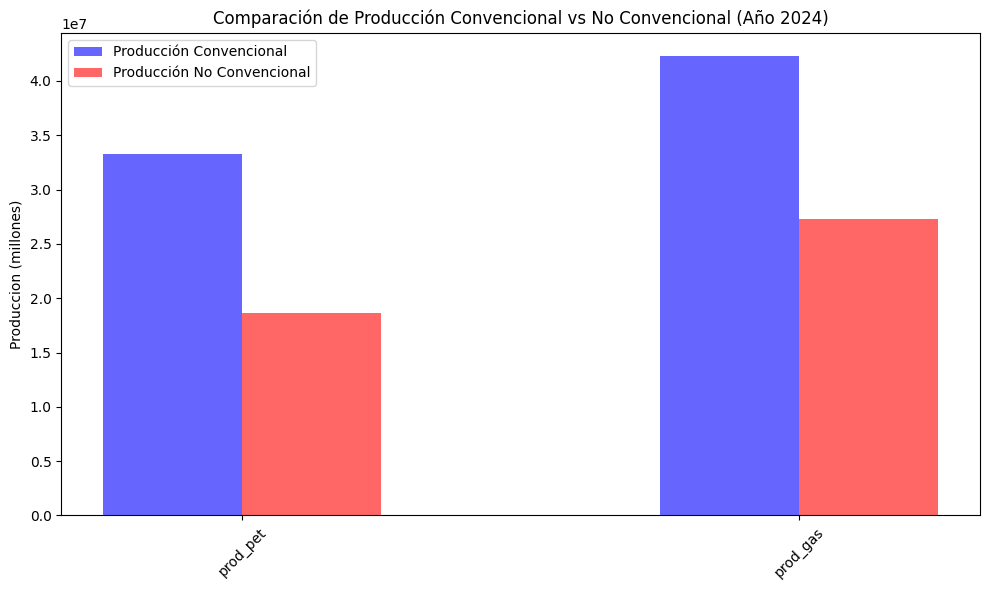

In [ ]:
## Analisis grafico de la produccion convencional y no convencional de petroleo y gas en 2024
produccion_no_convencional_2024 = produccion_no_convencional[produccion_no_convencional['anio'] == 2024]
produccion_2024 = produccion[produccion['anio'] == 2024]
columnas_n = ['prod_pet', 'prod_gas']
columnas = ['prod_pet', 'prod_gas']

data = produccion_2024[columnas]
suma_columnas = data.sum()

data_n = produccion_no_convencional_2024[columnas_n]
suma_columnas_n = data_n.sum()

labels = suma_columnas.index  

x = range(len(labels))
width = 0.25  
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, suma_columnas, width, label='Producción Convencional', color='b', alpha=0.6)
ax.bar([p + width for p in x], suma_columnas_n, width, label='Producción No Convencional', color='r', alpha=0.6)

ax.set_xlabel("")
ax.set_ylabel('Produccion (millones)')
ax.set_title('Comparación de Producción Convencional vs No Convencional (Año 2024)')
ax.set_xticks([p + width/2 for p in x]) 
ax.set_xticklabels(labels, rotation=45)
ax.legend()


plt.tight_layout()
plt.show()

In [ ]:
## Sabiendo la ubicacion geografica de los pozos, podemos separar la produccion de gas y petroleo por areas/formaciones/provincias/et.
## De esta manera podemos saber donde se produce mas y menos gas y petroleo en las distintas partes de argentina.
produccion_no_convencional_2024_provincias = produccion_no_convencional[produccion_no_convencional['anio'] == 2024]
produccion_2024_provincias = produccion[produccion['anio'] == 2024]
columnas_n_provincias = ['prod_pet', 'prod_gas', 'provincia']
columnas_provincias = ['prod_pet', 'prod_gas', 'provincia']
print(produccion_no_convencional[columnas_n_provincias])
print(produccion[columnas_provincias])


        prod_pet  prod_gas  provincia
0           0.00     32.78    Neuquén
1           2.59    494.57    Neuquén
2           0.00     43.77    Neuquén
3           0.00    444.02    Neuquén
4          14.35    430.95    Neuquén
...          ...       ...        ...
324072      0.00      0.00  Rio Negro
324073      0.00      0.00    Neuquén
324074      0.00      0.00  Rio Negro
324075    282.64   2582.09  Rio Negro
324076    179.45    931.97  Rio Negro

[324077 rows x 3 columns]
        prod_pet  prod_gas  provincia
0           0.00      0.00  Rio Negro
1           0.00      0.00  Rio Negro
2           0.00      0.00  Rio Negro
3           0.00      0.00  Rio Negro
4           0.00      0.00  Rio Negro
...          ...       ...        ...
806531      0.00      0.00  Rio Negro
806532      0.00      0.00  Rio Negro
806533      0.00      0.00  Rio Negro
806534      0.00      0.00  Rio Negro
806535      0.00      0.00  Rio Negro

[806536 rows x 3 columns]


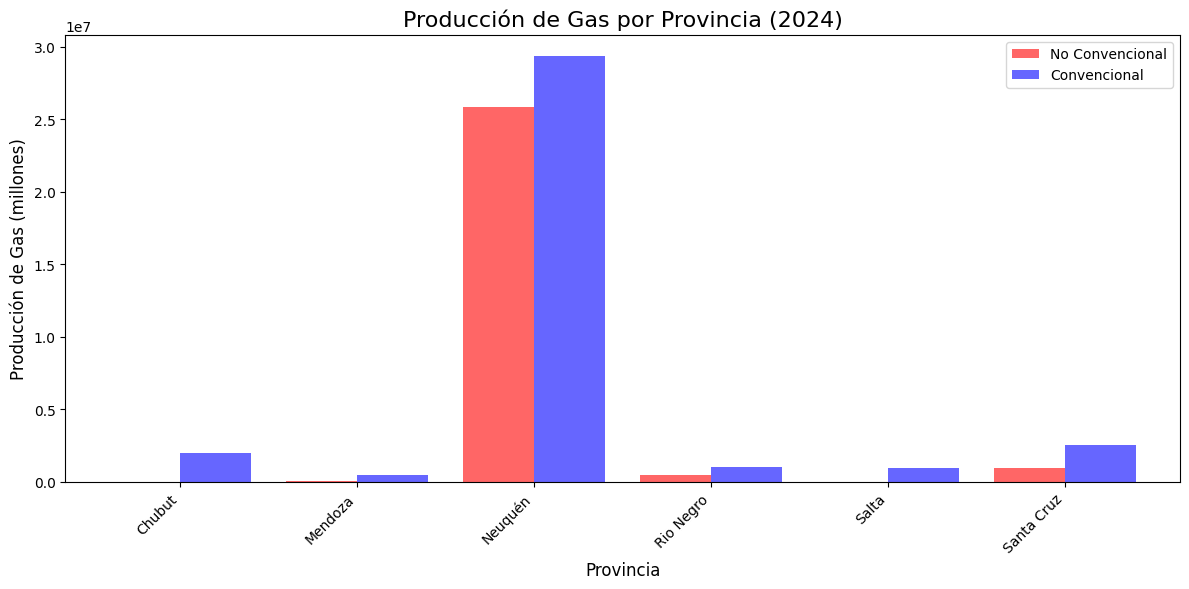

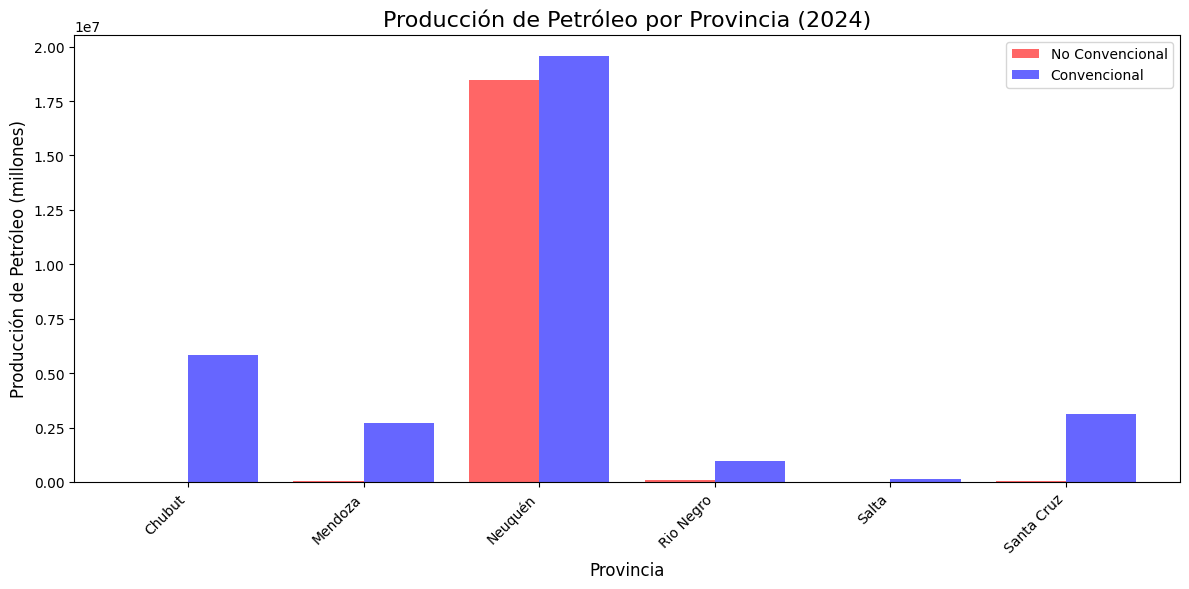

In [ ]:

produccion_no_convencional_2024_provincias = produccion_no_convencional[produccion_no_convencional['anio'] == 2024]
produccion_2024_provincias = produccion[produccion['anio'] == 2024]
columnas_n_provincias = ['prod_pet', 'prod_gas', 'provincia']
columnas_provincias = ['prod_pet', 'prod_gas', 'provincia']
prod_no_convencional_por_provincia = produccion_no_convencional_2024_provincias[columnas_n_provincias].groupby('provincia').sum()
prod_convencional_por_provincia = produccion_2024_provincias[columnas_provincias].groupby('provincia').sum()
produccion_comparativa = pd.merge(prod_no_convencional_por_provincia, prod_convencional_por_provincia, 
                                  on='provincia', suffixes=('_no_conv', '_conv'))

# GRAFICO 1: PRODUCCION DE GAS POR PROVINCIA
fig, ax = plt.subplots(figsize=(12, 6))
produccion_comparativa[['prod_gas_no_conv', 'prod_gas_conv']].plot(kind='bar', ax=ax, width=0.8, color=['r', 'b'], alpha=0.6)
plt.title('Producción de Gas por Provincia (2024)', fontsize=16)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Producción de Gas (millones)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(['No Convencional', 'Convencional'])
plt.tight_layout()
plt.show()

# GRAFICO 2: PRODUCCION DE PETROLEO POR PROVINCIA
fig, ax = plt.subplots(figsize=(12, 6))
produccion_comparativa[['prod_pet_no_conv', 'prod_pet_conv']].plot(kind='bar', ax=ax, width=0.8, color=['r', 'b'], alpha=0.6)
plt.title('Producción de Petróleo por Provincia (2024)', fontsize=16)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Producción de Petróleo (millones)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(['No Convencional', 'Convencional'])
plt.tight_layout()
plt.show()


provincia
Chubut              5812457.43
Estado Nacional      162869.75
Formosa               29351.38
Jujuy                  8225.93
La Pampa             611367.82
Mendoza             2727703.99
Neuquén            19566879.08
Rio Negro            949102.41
Salta                133679.04
Santa Cruz          3135448.19
Tierra del Fuego     176568.09
Name: prod_pet, dtype: float64


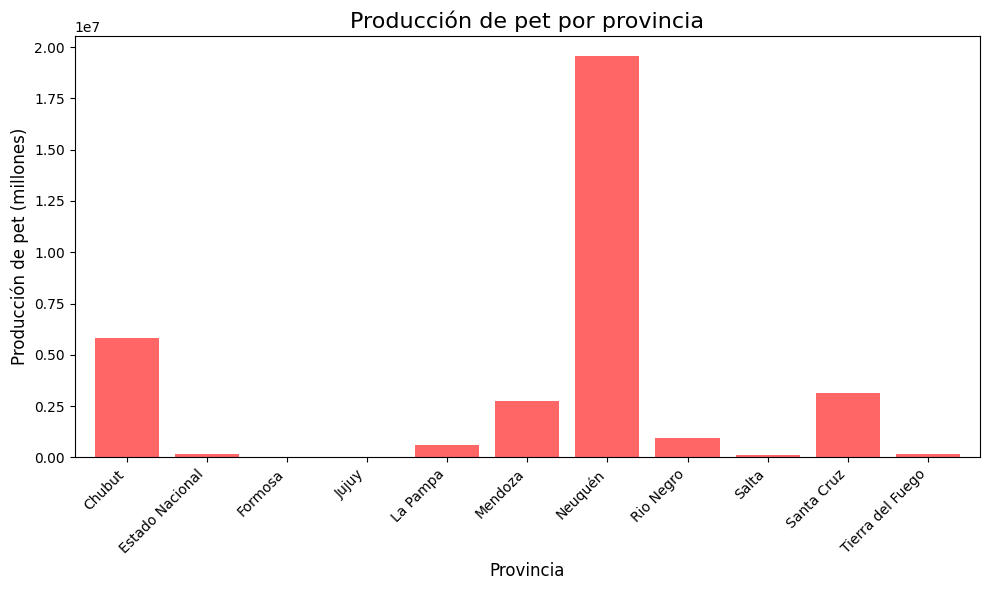

In [ ]:
suma_por_provincia_pet = produccion.groupby('provincia')['prod_pet'].sum()
print(suma_por_provincia_pet)

fig, ax = plt.subplots(figsize=(10, 6))
suma_por_provincia_pet = produccion.groupby('provincia')['prod_pet'].sum()
suma_por_provincia_pet.plot(kind='bar', ax=ax, width=0.8, color='r', alpha=0.6)
plt.title('Producción de pet por provincia', fontsize=16)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Producción de pet (millones)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
## Primero buscamos los datos anomalos con KMeans, buscando los datos que esten por arriba del 95% percentil de las distancias de producciones
X = produccion[['prod_pet']].values  
kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans.fit(X)
distancias = np.linalg.norm(X - kmeans.cluster_centers_[kmeans.labels_], axis=1)
umbral = np.percentile(distancias, 95)
anomalos = produccion.loc[distancias > umbral, 'prod_pet'] 
anomalos_desc = anomalos.sort_values(ascending=False)
print(anomalos_desc)

399827   19826.74
398457   18034.33
399255   16436.80
397758   14645.79
398948   14528.63
           ...   
576128     125.78
496483     125.78
553498     125.77
466776     125.77
357146     125.76
Name: prod_pet, Length: 40327, dtype: float64


C:\Users\T14s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


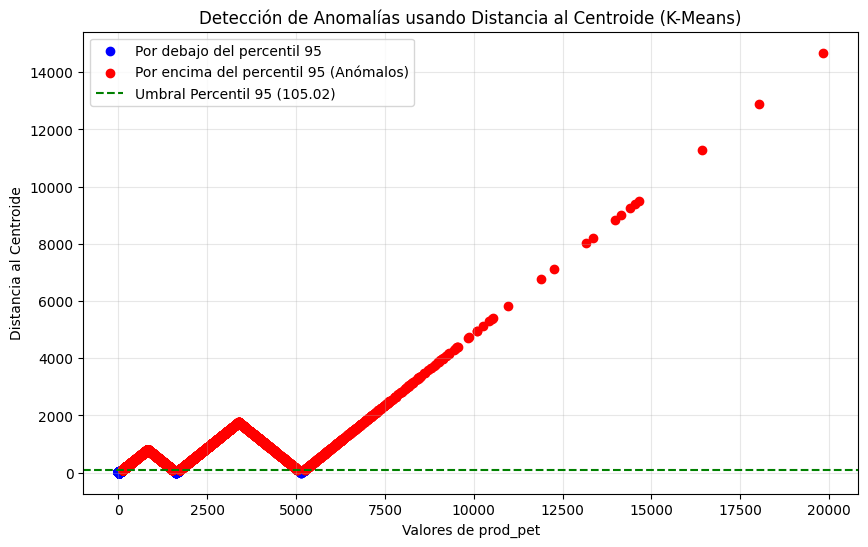

In [ ]:
below_threshold = distancias <= umbral
above_threshold = distancias > umbral
plt.figure(figsize=(10, 6))
plt.scatter(X[below_threshold], distancias[below_threshold], color='blue', label='Por debajo del percentil 95')
plt.scatter(X[above_threshold], distancias[above_threshold], color='red', label='Por encima del percentil 95 (Anómalos)')
plt.axhline(y=umbral, color='green', linestyle='--', label=f'Umbral Percentil 95 ({umbral:.2f})')
plt.title('Detección de Anomalías usando Distancia al Centroide (K-Means)')
plt.xlabel('Valores de prod_pet')
plt.ylabel('Distancia al Centroide')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

C:\Users\Usuario\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


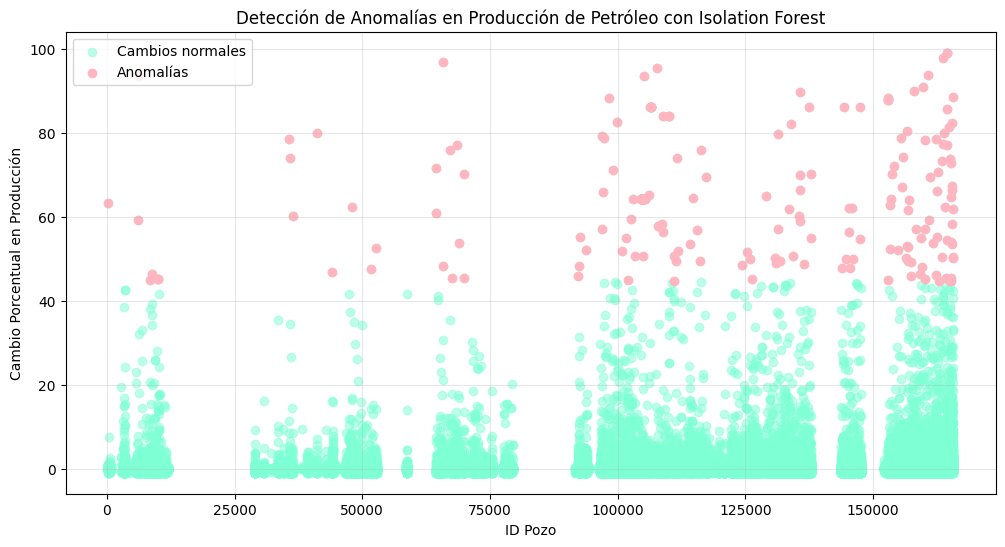

        idpozo  cambio_pct
643250     216   63.358209
411932    6001   59.132276
406428    6328   93.402310
802675    8408   45.022814
636664    8862   46.285714
...        ...         ...
255621  165427   53.460487
587413  165525   88.479964
399346  165549   50.039446
334522  165570   50.417952
375798  165686   61.744807

[202 rows x 2 columns]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Asegurarse de que los valores infinitos y NaN se eliminen
produccion = produccion.replace([np.inf, -np.inf], np.nan)
produccion = produccion.dropna(subset=['cambio_pct'])

# Opcional: Eliminar valores extremadamente grandes en la columna 'cambio_pct'
produccion = produccion[produccion['cambio_pct'].abs() < 100]

# Usar Isolation Forest para detectar anomalías
model = IsolationForest(contamination=0.001, random_state=42)  # Ajustamos la contaminación a 1% para menos anomalías
produccion['anomaly'] = model.fit_predict(produccion[['cambio_pct']])

# Las predicciones de Isolation Forest son -1 para anomalías y 1 para puntos normales
# Filtramos las anomalías
anomalos = produccion[produccion['anomaly'] == -1]

# Graficamos los resultados con colores ajustados
plt.figure(figsize=(12, 6))
plt.scatter(produccion['idpozo'], produccion['cambio_pct'], color='#7FFFD4', alpha=0.5, label='Cambios normales')  # Verde agua
plt.scatter(anomalos['idpozo'], anomalos['cambio_pct'], color='#FFB6C1', label='Anomalías')  # Rojo pastel
plt.title('Detección de Anomalías en Producción de Petróleo con Isolation Forest')
plt.xlabel('ID Pozo')
plt.ylabel('Cambio Porcentual en Producción')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Ver las anomalías detectadas
print(anomalos[['idpozo', 'cambio_pct']])




